In [ ]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Load datasets
train_data = pd.read_csv('Train.csv')
val_data = pd.read_csv('Val.csv')
test_data = pd.read_csv('Test.csv')

In [ ]:
# Extract features and labels
X_train, y_train = train_data[['x1', 'x2']].values, train_data['label'].values
X_val, y_val = val_data[['x1', 'x2']].values, val_data['label'].values
X_test, y_test = test_data[['x1', 'x2']].values, test_data['label'].values

In [ ]:
# Define parameters to test
degrees = [2, 3, 4, 5]
C_values = [1, 10, 100]
results = {}

In [ ]:
# Train SVM models with polynomial kernels
for degree in degrees:
    for C in C_values:
        model = SVC(kernel='poly', degree=degree, C=C, random_state=42)
        model.fit(X_train, y_train)

        # Calculate accuracies
        train_acc = accuracy_score(y_train, model.predict(X_train))
        val_acc = accuracy_score(y_val, model.predict(X_val))
        test_acc = accuracy_score(y_test, model.predict(X_test))

        # Store results
        results[(degree, C)] = {
            'train_acc': train_acc,
            'val_acc': val_acc,
            'test_acc': test_acc,
            'model': model
        }

In [ ]:
# Compile accuracy results into a DataFrame
accuracy_table = pd.DataFrame(
    [(degree, C, res['train_acc'], res['val_acc'], res['test_acc'])
     for (degree, C), res in results.items()],
    columns=['Degree', 'C', 'Train Accuracy', 'Validation Accuracy', 'Test Accuracy']
)
print("Accuracy Table:\n", accuracy_table)

Accuracy Table:
     Degree    C  Train Accuracy  Validation Accuracy  Test Accuracy
0        2    1        0.998217             1.000000         1.0000
1        2   10        1.000000             1.000000         1.0000
2        2  100        0.998217             1.000000         1.0000
3        3    1        0.531194             0.452830         0.5375
4        3   10        0.532977             0.459119         0.5375
5        3  100        0.532977             0.459119         0.5375
6        4    1        0.998217             1.000000         1.0000
7        4   10        0.998217             1.000000         1.0000
8        4  100        0.998217             1.000000         1.0000
9        5    1        0.680927             0.622642         0.7125
10       5   10        0.661319             0.610063         0.7000
11       5  100        0.661319             0.610063         0.7000


<ipython-input-14-b5734b810f2e>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  degree_table['C'] = degree_table['C'].astype(int)
<ipython-input-14-b5734b810f2e>:21: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot = annot.applymap(lambda x: f"{x:.4f}" if isinstance(x, float) else f"{x}")


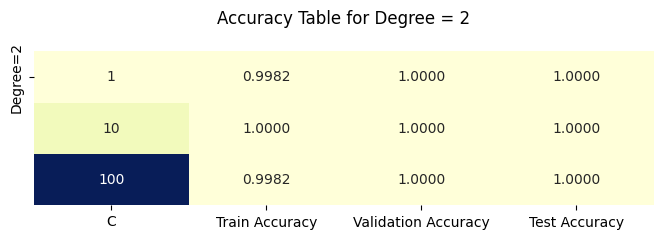

<ipython-input-14-b5734b810f2e>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  degree_table['C'] = degree_table['C'].astype(int)
<ipython-input-14-b5734b810f2e>:21: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot = annot.applymap(lambda x: f"{x:.4f}" if isinstance(x, float) else f"{x}")


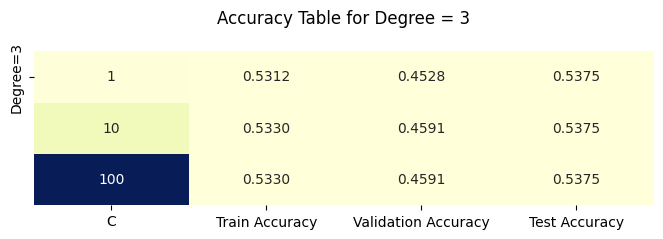

<ipython-input-14-b5734b810f2e>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  degree_table['C'] = degree_table['C'].astype(int)
<ipython-input-14-b5734b810f2e>:21: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot = annot.applymap(lambda x: f"{x:.4f}" if isinstance(x, float) else f"{x}")


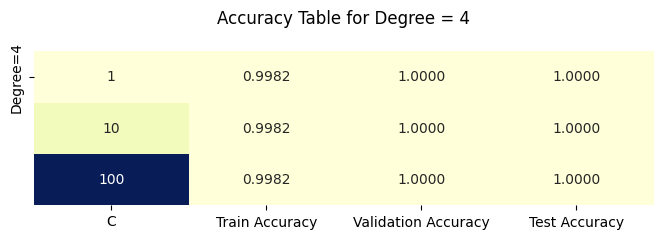

<ipython-input-14-b5734b810f2e>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  degree_table['C'] = degree_table['C'].astype(int)
<ipython-input-14-b5734b810f2e>:21: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot = annot.applymap(lambda x: f"{x:.4f}" if isinstance(x, float) else f"{x}")


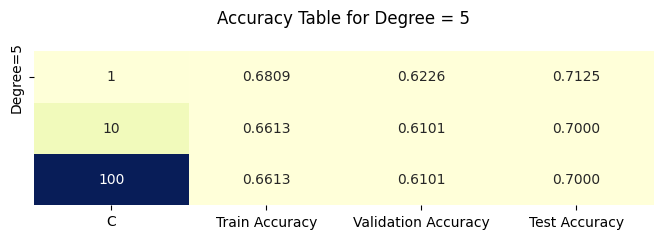

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming accuracy_table is already defined
# List unique degrees in the accuracy table
degrees = accuracy_table['Degree'].unique()

# Generate a separate table for each degree
for degree in degrees:
    # Filter accuracy_table for the current degree
    degree_table = accuracy_table[accuracy_table['Degree'] == degree]

    # Convert 'C' column values to integers
    degree_table['C'] = degree_table['C'].astype(int)

    # Creating a custom annotation array to format 'C' as integers and other columns with 4 decimals
    annot = degree_table[['C', 'Train Accuracy', 'Validation Accuracy', 'Test Accuracy']].copy()
    annot['C'] = annot['C'].astype(int)  # integer format for C
    annot = annot.applymap(lambda x: f"{x:.4f}" if isinstance(x, float) else f"{x}")

    # Plotting the table with seaborn for a colorful, boxed format
    plt.figure(figsize=(8, 2))
    ax = sns.heatmap(degree_table[['C', 'Train Accuracy', 'Validation Accuracy', 'Test Accuracy']],
                     annot=annot.values, fmt="", cmap="YlGnBu", cbar=False,
                     xticklabels=['C', 'Train Accuracy', 'Validation Accuracy', 'Test Accuracy'],
                     yticklabels=[f'Degree={degree}'])

    # Adjusting title and layout
    plt.title(f'Accuracy Table for Degree = {degree}', pad=20)
    plt.xlabel("")  # Remove default x-axis label to avoid it at the bottom
    plt.ylabel("")  # Remove default y-axis label
    plt.show()


In [ ]:
# Find the best model based on the criteria:
# 1. Maximum validation accuracy
# 2. If validation accuracy is the same, choose maximum test accuracy
# 3. If both are the same, choose maximum train accuracy

# This line sorts `results` based on the three criteria in descending order and picks the best
best_params = max(results.items(), key=lambda x: (x[1]['val_acc'], x[1]['test_acc'], x[1]['train_acc']))

# Extract the degree and C values from the best_params
best_degree, best_C = int(best_params[0][0]), int(best_params[0][1])
best_model = results[(best_degree, best_C)]['model']

# Print the best parameters
print(f"The best degree is: {best_degree}")
print(f"The best C value is: {best_C}")
print(f"Validation Accuracy: {best_params[1]['val_acc']}")
print(f"Test Accuracy: {best_params[1]['test_acc']}")
print(f"Train Accuracy: {best_params[1]['train_acc']}")


The best degree is: 2
The best C value is: 10
Validation Accuracy: 1.0
Test Accuracy: 1.0
Train Accuracy: 1.0


The best degree is: 2
The best C value is: 10


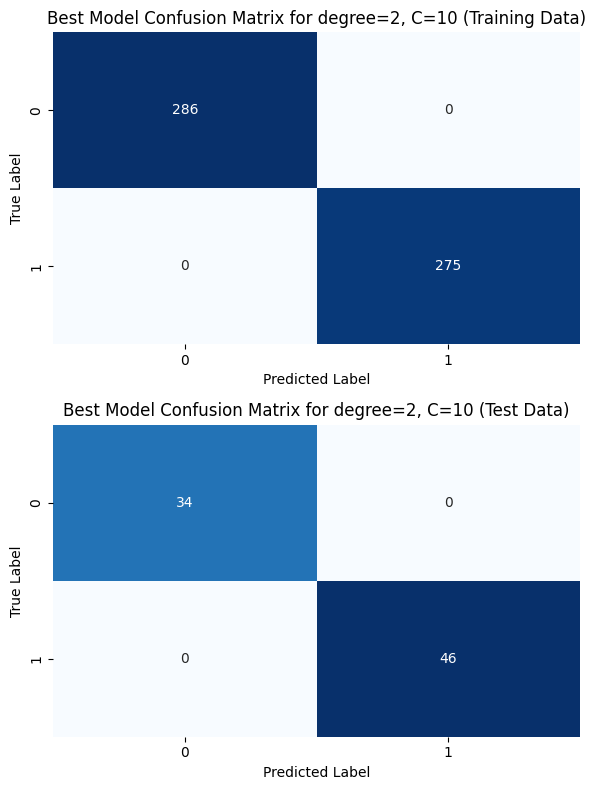

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate confusion matrices for the best model
train_confusion = confusion_matrix(y_train, best_model.predict(X_train))
test_confusion = confusion_matrix(y_test, best_model.predict(X_test))

# Display the best parameters
print(f"The best degree is: {best_degree}")
print(f"The best C value is: {best_C}")

# Create top-bottom plots
fig, axes = plt.subplots(2, 1, figsize=(6, 8))

# Plot confusion matrix for training data
sns.heatmap(train_confusion, annot=True, fmt="d", cmap="Blues", cbar=False, ax=axes[0])
axes[0].set_title(f"Best Model Confusion Matrix for degree={best_degree}, C={best_C} (Training Data)")
axes[0].set_xlabel("Predicted Label")
axes[0].set_ylabel("True Label")

# Plot confusion matrix for test data
sns.heatmap(test_confusion, annot=True, fmt="d", cmap="Blues", cbar=False, ax=axes[1])
axes[1].set_title(f"Best Model Confusion Matrix for degree={best_degree}, C={best_C} (Test Data)")
axes[1].set_xlabel("Predicted Label")
axes[1].set_ylabel("True Label")

plt.tight_layout()
plt.show()


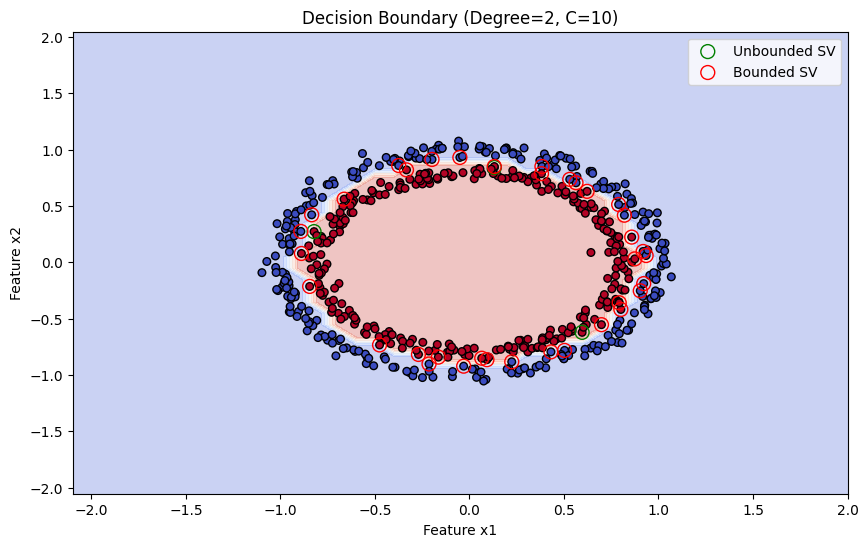

In [ ]:
def plot_decision_boundary_with_support_vectors(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.coolwarm, edgecolor='k')

    # Mark bounded and unbounded support vectors
    support_vectors = model.support_vectors_
    dual_coef = model.dual_coef_.flatten()
    C = model.C

    # Unbounded support vectors (0 < alpha < C)
    unbounded_sv = support_vectors[(np.abs(dual_coef) < C) & (np.abs(dual_coef) > 0)]
    # Bounded support vectors (alpha = C)
    bounded_sv = support_vectors[np.abs(dual_coef) == C]

    plt.scatter(unbounded_sv[:, 0], unbounded_sv[:, 1], s=100, facecolors='none', edgecolors='green', label='Unbounded SV')
    plt.scatter(bounded_sv[:, 0], bounded_sv[:, 1], s=100, facecolors='none', edgecolors='red', label='Bounded SV')

    plt.title(title)
    plt.xlabel('Feature x1')
    plt.ylabel('Feature x2')
    plt.legend()
    plt.show()

# Use this function to plot the decision boundary and mark bounded and unbounded support vectors
plot_decision_boundary_with_support_vectors(best_model, X_train, y_train,
                                            f"Decision Boundary (Degree={best_degree}, C={best_C})")
